# GenCP VHR demo

This notebook demonstrates the process of generating synthetic GCP image chips from OSM raster maps created for VHR. 

The test dataset, which belongs to SkySat satellite imagery, is located in the **"VHR/gencp_VHR_data_test/"** directory. 

The VHR model trained using the TensorFlow library can be accessed through the following link:

HTML('<a href="https://mega.nz/file/eSpjWYaB#8UjUBgSG3hpSr0AlPWa1CRLaplwIzSaymOywkGATzss">Click here to access the VHR model</a>')

The model was trained using dataset-4, as specified in the study report. 

The generated synthetic images were saved in the **"VHR/output/"** directory.


## Installation

In [ ]:
!pip install -r requirements_VHR.txt

In [4]:
import os
import random
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt


## Visualize OSM raster example

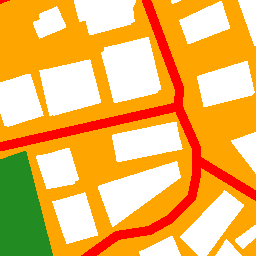

In [30]:
# path to test set
dataroot = "./gencp_VHR_data_test/masks"

# show test data example
img_example = random.choice(os.listdir(dataroot))
img = Image.open(os.path.join(dataroot, img_example))
display(img)

## Generate images for all test samples

For the generation of images, both the images and masks need to be in a 3-band RGB format with 8-bit radiometric resolution.

In [2]:
!python test_VHR.py --model_path "./VHR_model_weight/model_021888.h5" --img_files "./gencp_VHR_data_test/images/*.tif" --masks_files "./gencp_VHR_data_test/masks/*.tif" --output_folder "./output/"


=== Model Summary ===
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 128, 128, 64  3136        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu_5 (LeakyReLU)      (None, 128, 128, 64  0           ['conv2d_6[0][0]']               
                                )                                    

2025-02-27 00:26:16.599239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-27 00:26:16.674873: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21458 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9
2025-02-27 00:26:18.097813: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2025-02-27 00:26:19.143344: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code -1, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


## Visualize generated images

Text(0.5, 1.0, 'Generated Image')

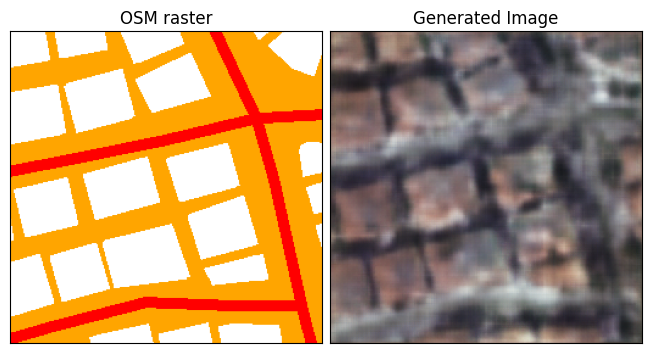

In [33]:
# path to test set
generated_dataroot = "./output"

# select random generated image

img_example = random.choice(os.listdir(generated_dataroot))
img_basename = img_example.replace("_preds.tif", "")
img_basename = img_basename.replace("_patch_", "_mask_") + ".tif"

osm_raster_path = os.path.join(dataroot, img_basename)
gen_img_path = os.path.join(generated_dataroot, img_example)  


osm_img = Image.open(osm_raster_path)
gen_img = Image.open(gen_img_path)


%matplotlib inline

# display images
fig, ax = plt.subplots(1,2, constrained_layout=True)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelbottom=False)
    ax[i].yaxis.set_tick_params(labelleft=False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[0].imshow(osm_img)
ax[0].set_title('OSM raster')
ax[1].imshow(gen_img)
ax[1].set_title('Generated Image')
